<div style="text-align: center;">
<h2>INFSCI 2595 Machine Learning - Fall 2018 </h2>
<h1 style="font-size: 250%;">Assignment #1</h1>
<h3>Due: Sunday 09/30/2018</h3>
<h3>Total points: 100 </h3>
</div>

In [2]:
# Type in your information in the double quotes
firstName = "Mangquan"
lastName = "Shi"
pittID = "4301007" mas792

In [1]:
#Libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import Image
import statsmodels.formula.api as smf
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import datasets

---

<h3>  Problem #1. K-nearest neighbors  [20 points] </h3> 

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
Suppose we wish to use this data set to make a prediction for Y when X1 = 1.2, X2 = 1.3, X3 = 2.4 using K-nearest neighbors.
hint: in problems 1-2 and 1-3, use "stats.mode" from scipy library and "nsmallest" function in dataframe to get n smallest values from the distance table calculated in 1-1.

|Obs.|X1|X2|X3|Y
|--|-------------------------------|
|1 |0.1|2.9|0|Green|
|2 |2.2|0|0|Green|
|3|0|1.3|3.3|Green|
|4|0|1.4|2.5|Red|
|5|-1.2|0|1.4|Red|
|6|1.1|1.2|1.1|Green|
|7|1.5|0|0|Green|
|8|0|1.3|1.9|Red|
|9|0|2.8|0|Green|

<b>Problem #1-1.</b> Compute the Euclidean distance between each observation and the test point, X1 = 1.2, X2 = 1.3, X3 = 2.4
The output should be a (9*1) column vector where each row shows the distance between the observations and the test point.


In [5]:
# Answer code 
# here is all data 
data = pd.DataFrame(np.array(
       [[1, 0.1, 2.9, 0.0, 'Green'],
       [2, 2.2, 0.0, 0.0, 'Green'],
       [3, 0.0, 1.3, 3.3, 'Green'],
       [4, 0.0, 1.4, 2.5, 'Red'],
       [5, -1.2, 0.0, 1.4, 'Red'],
       [6, 1.1, 1.2, 1.1, 'Green'],
       [7, 1.5, 0.0, 0.0, 'Green'],
       [8, 0.0, 1.3, 1.9, 'Red'],
       [9, 0.0, 2.8, 0.0, 'Green']]))

data.columns = ['Obs', 'X1', 'X2', 'X3', 'Y']

example = np.array([1.2, 1.3, 2.4])

print("The Euclidean distance matrix is: ")
distance = np.sum(np.square(example - data[['X1', 'X2', 'X3']].values.astype(float)), axis=1)
print(np.sqrt(distance.reshape(9,1)))

print("Add distance column into the datasets: ")
data['Distance'] = np.sqrt(distance.reshape(9, 1))
print(data)


The Euclidean distance matrix is: 
[[3.08706981]
 [2.90688837]
 [1.5       ]
 [1.2083046 ]
 [2.90688837]
 [1.30766968]
 [2.74590604]
 [1.3       ]
 [3.07408523]]
Add distance column into the datasets: 
  Obs    X1   X2   X3      Y  Distance
0   1   0.1  2.9  0.0  Green  3.087070
1   2   2.2  0.0  0.0  Green  2.906888
2   3   0.0  1.3  3.3  Green  1.500000
3   4   0.0  1.4  2.5    Red  1.208305
4   5  -1.2  0.0  1.4    Red  2.906888
5   6   1.1  1.2  1.1  Green  1.307670
6   7   1.5  0.0  0.0  Green  2.745906
7   8   0.0  1.3  1.9    Red  1.300000
8   9   0.0  2.8  0.0  Green  3.074085


=========================================================================================================================

<b>Problem #1-2.</b> What is our prediction with K = 1? and explain why.

In [23]:
#Answer code
print('The predication with k =1 is')

print (data.nsmallest(1,'Distance')['Y'])

print('Beacuse predicaiton is based on the distance between the test point and the rest of the points in the data set, so in this case(K = 1 ), the prediction we made is actually to find the closest point that around the test point which is point 3 red colour.')


The predication with k =1 is
3    Red
Name: Y, dtype: object
Beacuse predicaiton is based on the distance between the test point and the rest of the points in the data set, so in this case(K = 1 ), the prediction we made is actually to find the closest point that around the test point which is point 3 red colour.


=========================================================================================================================

<b>Problem #1-3.</b> What is our prediction with K = 3? K = 5? and explain why.

In [25]:
# Answer code 
print('The predication with k = 3 is')

print (stats.mode(data.nsmallest(3,'Distance')['Y']))

The predication with k = 3 is
ModeResult(mode=array(['Red'], dtype=object), count=array([2]))


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [27]:
# Answer code
print('The predication with k = 5 is')

print (stats.mode(data.nsmallest(5,'Distance')['Y']))


The predication with k = 5 is
ModeResult(mode=array(['Green'], dtype=object), count=array([3]))


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


=========================================================================================================================

<b>Problem #1-4.</b>  How using a different number of K has an impact on the performance? explain.

=========================================================================================================================<br>=========================================================================================================================

<h3>  Problem #2. Answer those questions about linear regression [30 points] </h3>  
- Writing a code is not required for this question<br>
- Feel free to select any type of submission you are comfortable with (Since it may require some mathematical formula and symbols; MS Word, or scanned version of your writing will be fine) 

<b>Problem #2-1.</b> Find the least squared fit of a linear regression model using the following traning data.

|Height(x)|Weight(y)|
|:--:|:-------------------------------:|
|63|127|
|64|121|
|66|142|
|69|157|
|69|162|
|71|156|
|71|169|
|72|165|
|73|181|

In [5]:
#Write your answer # Coding is not required

1. First we assume the relationship is linear, so that we can write in this format:
    
    Y_predict = B1 * X + B0.
    
2. Then we need to use RSS to evaluate how good the chose of B1 and B0 is,

RSS = (Y - Y_predict)^2 = (Y - B0 - B1*X)^2

3. Our goal is to minize the RSS, so we take the partial derivative of RSS regarding to B0 and B1 respectly. 
And compute the B0 and B1 so that partial derivative terms will equal to 0.

4.  B0 = mean of Y - B1*(mean of X), so it's clear we need to compute the B1 first.

5. B1 = ((sum of y*x) - (sum of y_mean*x)) / ((sum of x^2) - (sum of x_mean*x))
      = sum of (y - y_mean)(x - x_mean) / sum of(x - x_mean) = 5.2549
    
    so that B0 = -207.5032
    
6. So the model is Y = 5.2549*x - 207.5032




/anaconda3/lib/python3.6/site-packages/pandas/io/clipboards.py:63: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_table(StringIO(text), sep=sep, **kwargs)


========================================================================================================================

<b>Problem #2-2.</b> Given the test data below, compute the R-squared metric of the fitted model.

|X(feeding)|Y(death)|
|:--:|:-------------------------------:|
|27|10|
|41|9|
|56|28|
|50|40|
|73|39|
|38|59|
|72|60|
|87|62|
|51|64|

In [1]:
#Write your answer # Coding is not required

1. Same as previous answer, we can get the B1 = 0.634 , B0 = 6.352

2. TSS = sum of (Y - Y_mean)^2 = 3813.5

   RSS = sum of (Y - B0 - B1*X)  = 2628.6298
3. R2 = 1- RSS/TSS = 0.310

======================================================================================================================= <br>=======================================================================================================================

<h3>  Problem #3. This question involves the use of multiple linear regression on the Boston dataset [30 points]</h3> <br>
In this part, you should download and analyze **"Boston House Prices"** dataset. <br>

Here use a code below to download the  dataset: 

In [2]:
dataset = load_boston()
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


Hint: You may need to "import statsmodels.formula.api as smf" for some statistical analysis

<b>Problem #3-1</b> Print the description of the dataset. 

<b> Answer the following question:</b> 

- Whole dataset contains 14 attributes, (13 numeric/categorical predictive and 1 target value)  what is a abbreviation of the target value? 

In [3]:
#Code
dataset.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

=======================================================================================================================

<b>Problem #3-2 </b> Generate descriptive statistics using DataFrame. (hint: use "DataFrame . describe" function)<br>

Follow two steps to answer questions.
- Create a DataFrame usnig "data" from the dataset with columns using "feature_names".
- Generate descriptive statistics 

<b> Answer the following questions:</b> 

-  Which feature has the lowest range (minimum and maximum value)?

-  Which feature has the higest mean?  

-  Which feature has a highest variance? 

In [6]:
#Code
houseData = pd.DataFrame(dataset.data)
houseData.columns = [dataset.feature_names]

describe = houseData.describe().T

describe['range'] = describe[['max']].values - describe[['min']].values
describe['variance'] = houseData.var()


print ('The feature has the lowest range is' )
print(describe.nsmallest(1,'range')[['range']])

print ('The feature has the highest mean is' )
print(describe.nlargest(1,'mean')[['mean']])

print ('The feature has the highest variance is' )
print(describe.nlargest(1,'variance')[['variance']])

The feature has the lowest range is
     range
NOX  0.486
The feature has the highest mean is
           mean
TAX  408.237154
The feature has the highest variance is
         variance
TAX  28404.759488


=======================================================================================================================

# <b>Problem #3-3 </b> Feature Scaling

<b> Answer the following questions:</b> 

- From the information above, Do you recommend **feature scaling** to improve performance? Explain.  

- What is a difference between MinMaxScaler and StandardScaler? 

# code here
1. In this case, it's very important to implement feature scaling, because the scales of different features vary greatly,by using feature scaling we can make sure every feature is being treated equally.

2. Minmaxsaler is a technique to rescale the dataset so that all features have the range within[0,1] which is achieved by taking every feature and divide it by the range. As for standardScaler, all the feature will subtract the mean then  be divided by the variance so that its distribution will have 0 mean and 1 variance.


=======================================================================================================================

<b>Problem #3-4 </b> Calculate and report **correlations** between features and the target 

<b> Answer the following questions:</b> 

- What is a difference between positive and negative numbers on the correlation table? Explain.
- What is the feature that is most correlated with the target? Do you think it is the most or the least helpful features in predicting the
target class? Explain.

In [ ]:
# code here
1. The positive numbers mean as the value of features increases the target value will increase too
, the negative values, however, indicate that the target value will decrease as the value of feature increases.

2. I think the LSTAT is the most helpful feature when it comes to predict the target 
and maybe CHAS will not help a lot in this case. The conclusion is based on the correlations matrix, in most cases
the bigger absolute value of the intersection item between the feature and target is, the more likely it will 
correlate with the target.

=======================================================================================================================

<b>Problem #3-5 </b> 
Follow two steps to answer questions.

- Add 1 more column (dataset.target) to your DataFrame (give a name).

- Find the correlation matrix that shows the correlation between each pair of features. <br>

- Plot a correlation matrix<br> You can use the code below or write your own code to plot a correlation matrix *(extra point for writing your own code)* 

 <b>Answer the following questions:</b> 

- What is the correlation between the feature RM and the LSTAT?


1.-0.613808


- What does this value of correlation indicate?


2. It means they are negative relative to each other, as one increases the other decreases.

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 

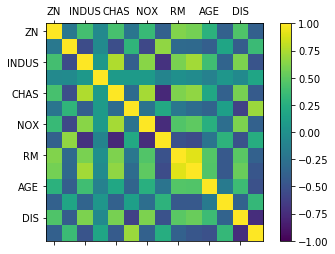

In [9]:
#code here
houseData['target'] = dataset.target

print(houseData.corr())

corrMatrix = houseData.corr()

fig = plt.figure()

ax = fig.add_subplot(111)

cax = ax.matshow(corrMatrix, vmin = -1, vmax = 1)

fig.colorbar(cax)

ax.set_xticklabels(dataset.feature_names)
ax.set_yticklabels(dataset.feature_names)

plt.show()



=======================================================================================================================

<b>Problem #3-6 </b> Scatter plot. <br> 

Follow three steps to answer questions <br> 
- Plot RM versus target variable 
- Plot TAX versus target variable 
- Plot LSTAT versus target variable <br> 

<b> Answer the following questions:</b> 
- Is the relationship linear?
- Which looks the most nonlinear? Explain your choice


**Plot RM versus target variable**

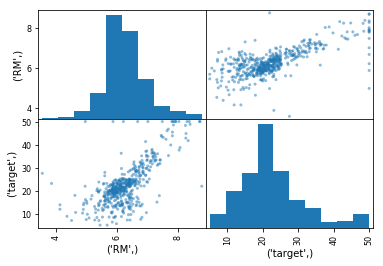

The relathionship between the RM and target should be linear.


In [38]:
#code here
from pandas.plotting import scatter_matrix

scatter_matrix(houseData[['RM','target']])
plt.show()

print("The relathionship between the RM and target should be linear.")

**Plot TAX versus target variable**

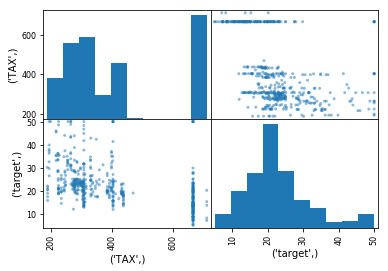

The relathionship between the target and tax might be non-linear, because as the value of target increases the counterpart of TAX stay the same. 


In [15]:
#code here
scatter_matrix(houseData[['TAX','target']])
plt.show()

print("The relathionship between the target and tax might be non-linear, because as the value of target increases the counterpart of TAX stay the same. ")

**Plot LSTAT versus target variable **

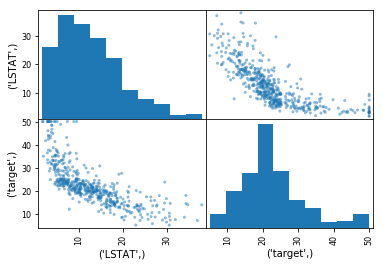

This could be linear or quadratic.


In [16]:
#code here
scatter_matrix(houseData[['LSTAT','target']])
plt.show()

print("This could be linear or quadratic.")

=======================================================================================================================

<b>Problem #3-7.</b> Follow steps to answer questions.
> *Use train_test_split() with the option "random_state=0".

1. Fit a linear regression model with RM and LSTAT features only. Find the R-squared metric. 
2. Fit a linear regression model using RM, LSTAT and include the interaction term (RM * LSTAT). How R-squared metric differs from the previous model without interaction term?
3. Fit a linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$).  Find the R-squared metric.
4. Fit linear regression model using LSTAT and include the polynomial term ( $LSTAT^2$ and $LSTAT^4$ ). Find the R-squared metric. 
- How does R-squared metric differ in the previous models ? <br> Comment your observation. 

**1.  Fit a linear regression model with RM and LSTAT features only**

In [18]:
#code here
X = houseData[['RM','LSTAT']].values

Y = houseData[['target']].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 0)

model = LinearRegression().fit(X_train,Y_train)

print('The R2 s of this model with RM and LSTAT term is ' + str(model.score(X_test, Y_test)))


The R2 s of this model with RM and LSTAT term is 0.5692445415835345


**2 Fit a linear regression model using RM, LSTAT and include the interaction term (RM * LSTAT)**

In [40]:
#code here
houseData['RM*LSTAT'] = houseData[['RM']].values * houseData[['LSTAT']].values

X = houseData[['RM','LSTAT','RM*LSTAT']].values

Y = houseData[['target']].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 0)

model = LinearRegression().fit(X_train,Y_train)

print('The R2 s of this model with RM and RM*LSTAT term is ' + str(model.score(X_test, Y_test)))

print('The R2 score of this model is higher, because the ineraction term is useful when it comes to this prediction.')





The R2 s of this model with RM and RM*LSTAT term is 0.6615207706770674
The R2 score of this model is higher, because the ineraction term is useful when it comes to this prediction.


**3 Fit a linear regression model using LSTAT and include the polynomial term (  LSTAT^2 )**

In [27]:
#code here
houseData['LSTAT*LSTAT'] = houseData[['LSTAT']].values * houseData[['LSTAT']].values

X = houseData[['LSTAT','LSTAT*LSTAT']].values

Y = houseData[['target']].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 0)

model = LinearRegression().fit(X_train,Y_train)

print('The R2 s of this model with RM and LSTAT term is ' + str(model.score(X_test, Y_test)))

The R2 s of this model with RM and LSTAT term is 0.5518753354137798


**4. Fit linear regression model using LSTAT and include the polynomial term (  LSTAT^2  and  LSTAT^4)**

In [39]:
#code here
houseData['LSTAT^4'] = houseData[['LSTAT*LSTAT']].values * houseData[['LSTAT*LSTAT']].values

X = houseData[['LSTAT','LSTAT*LSTAT','LSTAT^4']].values

Y = houseData[['target']].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 0)

model = LinearRegression().fit(X_train,Y_train)

print('The R2 s of this model with RM , LSTAT^2 and LSTAT^4 term is ' + str(model.score(X_test, Y_test)))

print('This model is slightly better than last one, maybe it is not necessarily to add the LSTAT^4 term.')

The R2 s of this model with RM , LSTAT^2 and LSTAT^4 term is 0.5696493127277786
This model is slightly better than last one, maybe it is not necessarily to add the LSTAT^4 term.


=========================================================================================================================

<b>Problem #3-8.</b> Fit all features (13 features) in the dataset to a multiple linear regression model, and report<br> 

> (1) p-values for each feature. 

<b> Answer the following questions:</b> 

- What does p-value means


P value means how likely the assumption we made(in this case the assumption is that the coefficent is not zero) is wrong. So we can use it as a indicator to show how the feature is relavent to the target value.

- What are the important features? <br>


CRIM , ZN, CHAS, NOX, RM, DIS, RAD ,TAX, PTRATIO,B, LSTAT.

In [32]:
#code here
import statsmodels.formula.api as smf

model = smf.ols('target ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX +PTRATIO + B + LSTAT',houseData)

result = model.fit()

print(result.summary())



                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 30 Sep 2018   Prob (F-statistic):          6.95e-135
Time:                        13:02:25   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

==========================================================================+============================================== <br> =========================================================================================================================

<b>Problem #4.</b>  Encoding categorical values

Given a dataset (encoding.csv) with three features and twenty samples with the following types:

- "Gender" is nominal feature in which order is not important (mapping can be used)
- "Race" is nominal feature (all values have the same weight). label encoding and one-hot encoding can be used together.
- "Satisfaction" is nominal feature in which order is important (label encoding can be used)

Use appropriate encoding method for each feature to convert the categorical values into a meaningful numerical values.

In [36]:
#code here

from sklearn import preprocessing
label = preprocessing.LabelEncoder()
encoding = pd.read_csv('encoding.csv')

encoding.Gender = encoding.Gender.map({'Male':0,'Female':1})
encoding.Race = label.fit_transform(encoding.Race)
encoding.Satisfaction = label.fit_transform(encoding.Satisfaction)


    Gender  Race  Satisfaction
0        0     4             4
1        0     4             1
2        0     4             4
3        1     1             0
4        0     1             1
5        1     2             1
6        0     2             4
7        1     2             0
8        1     4             0
9        1     2             1
10       0     3             2
11       0     3             3
12       0     3             3
13       1     3             0
14       0     3             2
15       0     2             3
16       0     0             3
17       1     0             0
18       0     0             2
19       1     1             1


### Submission
Once you complete the assignment, <br>
Name your file in the format of <b style='color:red'>LASTNAME-PITTID-Assignment1.ipynb</b>, and submit it on the courseweb